In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score, roc_auc_score, confusion_matrix, roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier

train = pd.read_csv('train_dataset.csv')
df=train.copy()



In [ ]:
print(train.shape)
print(train.head())
print(train.info())


(38984, 23)
   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0        19.8

In [ ]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
age,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
height(cm),38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
weight(kg),38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
waist(cm),38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
eyesight(left),38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
eyesight(right),38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
hearing(left),38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
hearing(right),38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
systolic,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
relaxation,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


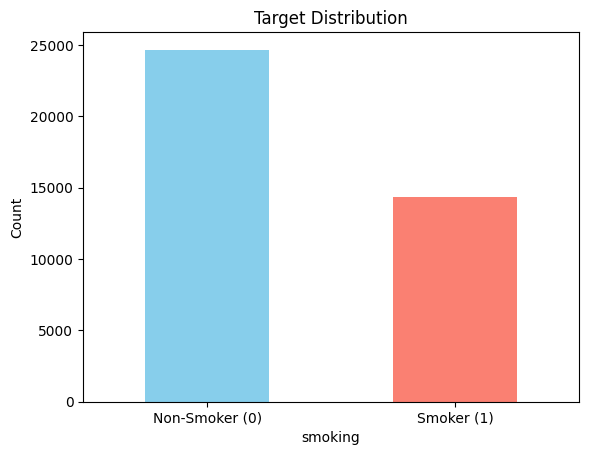

In [ ]:
plt.figure()
train['smoking'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Non-Smoker (0)', 'Smoker (1)'], rotation=0)
plt.ylabel("Count")
plt.title("Target Distribution")
plt.show()


In [ ]:
train['BMI'] = train['weight(kg)'] / (train['height(cm)'] / 100) ** 2
train[['weight(kg)', 'height(cm)', 'BMI']].head()


,weight(kg),height(cm),BMI
0,85,170,29.411765
1,110,175,35.918367
2,65,155,27.055151
3,80,165,29.384757
4,60,165,22.038567


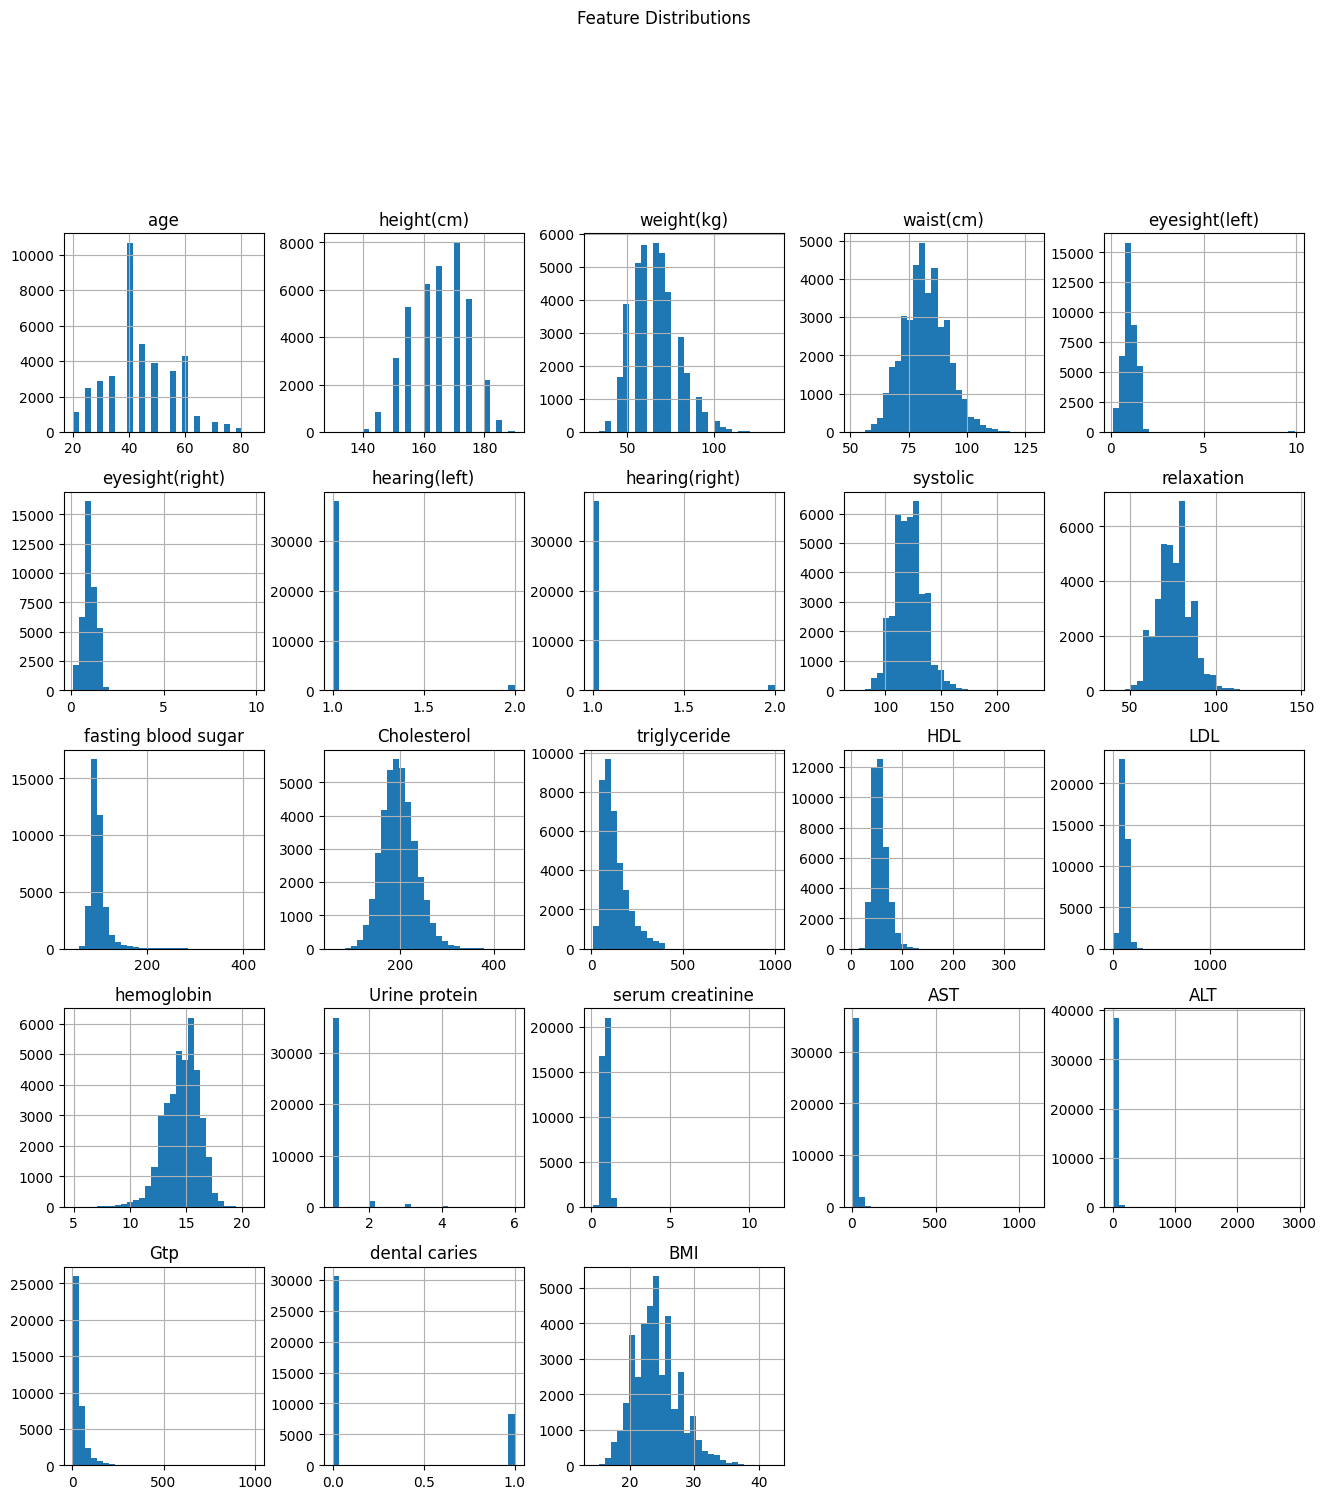

In [ ]:
num_cols = train.drop(columns=[ 'smoking']).select_dtypes(include=[np.number]).columns

train[num_cols].hist(bins=30, figsize=(16,16))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()


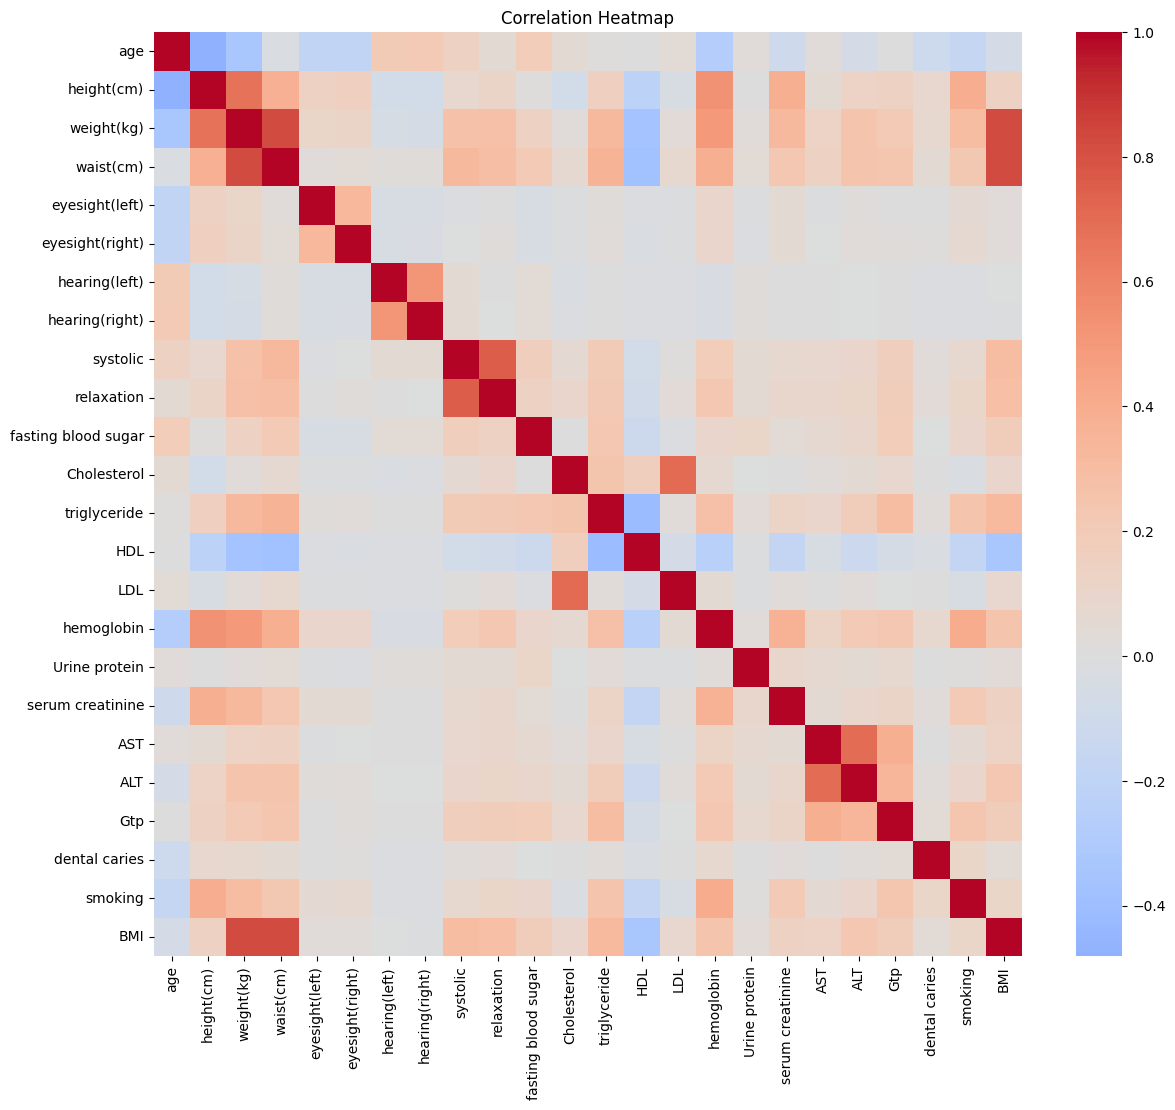

In [ ]:
plt.figure(figsize=(14, 12))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
corr_target = corr['smoking'].sort_values(ascending=False)
corr_target


,smoking
smoking,1.000000
hemoglobin,0.401206
height(cm),0.394314
weight(kg),0.299347
triglyceride,0.251057
Gtp,0.240274
waist(cm),0.223359
serum creatinine,0.212473
dental caries,0.107601
BMI,0.105488


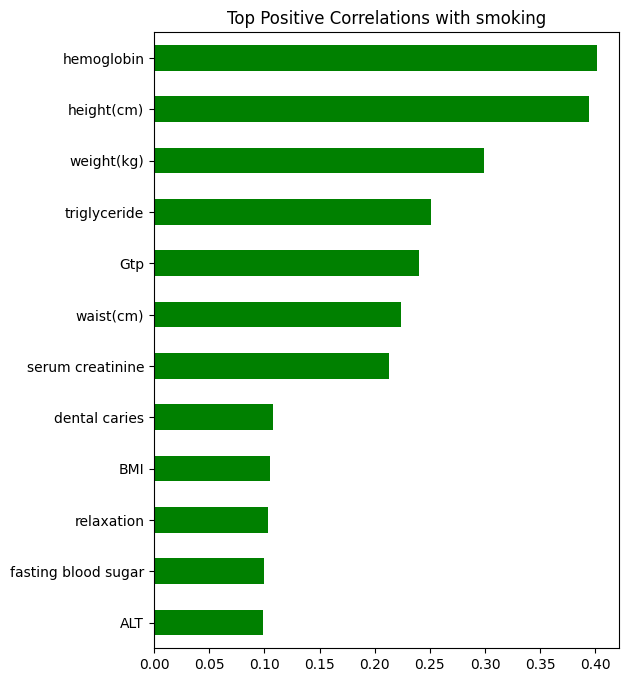

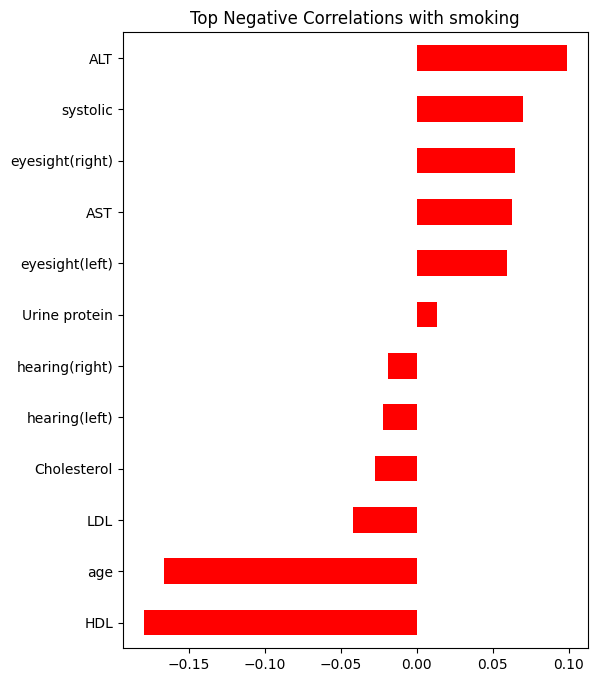

In [ ]:
plt.figure(figsize=(6,8))
corr_target.drop('smoking').head(12).plot(kind='barh', color='green')
plt.title("Top Positive Correlations with smoking")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(6,8))
corr_target.drop('smoking').tail(12).plot(kind='barh', color='red')
plt.title("Top Negative Correlations with smoking")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df["BMI"] = df["weight(kg)"] / (df["height(cm)"] / 100)**2

from sklearn.model_selection import train_test_split

X = df.drop(columns=["smoking", "id"], errors="ignore")
y = df["smoking"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)



X_train: (31187, 23)
X_test : (7797, 23)


In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "F2": fbeta_score(y_test, y_pred, beta=2),
        "ROC_AUC": roc_auc_score(y_test, y_prob),
        "CM": confusion_matrix(y_test, y_pred)
    }


In [ ]:
linear_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="linear", probability=True))
])

linear_svm.fit(X_train, y_train)
lin_results = evaluate_model(linear_svm, X_test, y_test)



In [ ]:
poly_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="poly", degree=2, C=5, gamma="scale", probability=True))
])

poly_svm.fit(X_train, y_train)
poly_results = evaluate_model(poly_svm, X_test, y_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='poly', probability=True))
])

param_grid = {
    'clf__degree': [2, 3],
    'clf__C': [1, 5, 10, 15],
    'clf__gamma': [0.01, 0.05, 'scale']
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=2
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best AUC Score:", grid.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Logistic Regression

In [ ]:
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])

log_reg.fit(X_train, y_train)
log_results = evaluate_model(log_reg, X_test, y_test)



Neural Networks

In [ ]:
scaler_nn = StandardScaler()
X_train_scaled = scaler_nn.fit_transform(X_train)
X_test_scaled = scaler_nn.transform(X_test)

nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

nn.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_pred_nn = (nn.predict(X_test_scaled) > 0.5).astype(int)
y_prob_nn = nn.predict(X_test_scaled).flatten()

nn_results = {
    "Accuracy": accuracy_score(y_test, y_pred_nn),
    "Precision": precision_score(y_test, y_pred_nn),
    "Recall": recall_score(y_test, y_pred_nn),
    "F1": f1_score(y_test, y_pred_nn),
    "F2": fbeta_score(y_test, y_pred_nn, beta=2),
    "ROC_AUC": roc_auc_score(y_test, y_prob_nn),
    "CM": confusion_matrix(y_test, y_pred_nn)
}





/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


MLP NeuralNetwork

In [ ]:
scaler_mlp = StandardScaler()
X_train_mlp = scaler_mlp.fit_transform(X_train)
X_test_mlp = scaler_mlp.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=256,
    learning_rate='adaptive',
    max_iter=100,
    random_state=42,
    verbose=True
)

mlp.fit(X_train_mlp, y_train)


y_pred_mlp = mlp.predict(X_test_mlp)
y_prob_mlp = mlp.predict_proba(X_test_mlp)[:, 1]

mlp_results = {
    "Accuracy": accuracy_score(y_test, y_pred_mlp),
    "Precision": precision_score(y_test, y_pred_mlp),
    "Recall": recall_score(y_test, y_pred_mlp),
    "F1": f1_score(y_test, y_pred_mlp),
    "F2": fbeta_score(y_test, y_pred_mlp, beta=2),
    "ROC_AUC": roc_auc_score(y_test, y_prob_mlp)
}

Iteration 1, loss = 0.50521364
Iteration 2, loss = 0.47813159
Iteration 3, loss = 0.47009108
Iteration 4, loss = 0.46454468
Iteration 5, loss = 0.46028152
Iteration 6, loss = 0.45552595
Iteration 7, loss = 0.44996969
Iteration 8, loss = 0.44485127
Iteration 9, loss = 0.44164700
Iteration 10, loss = 0.43575726
Iteration 11, loss = 0.43127986
Iteration 12, loss = 0.42395047
Iteration 13, loss = 0.42057505
Iteration 14, loss = 0.41173357
Iteration 15, loss = 0.40812087
Iteration 16, loss = 0.39882975
Iteration 17, loss = 0.39388217
Iteration 18, loss = 0.38327698
Iteration 19, loss = 0.37520654
Iteration 20, loss = 0.36791970
Iteration 21, loss = 0.35892197
Iteration 22, loss = 0.35496927
Iteration 23, loss = 0.34049662
Iteration 24, loss = 0.33532539
Iteration 25, loss = 0.32543324
Iteration 26, loss = 0.31554614
Iteration 27, loss = 0.30962136
Iteration 28, loss = 0.30274197
Iteration 29, loss = 0.29314381
Iteration 30, loss = 0.28422606
Iteration 31, loss = 0.27788944
Iteration 32, los

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix

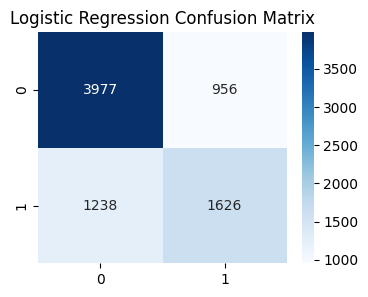

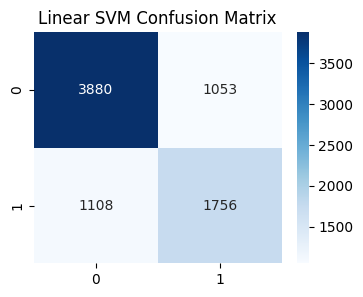

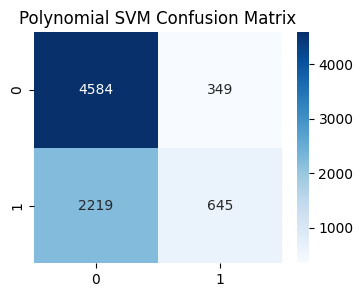

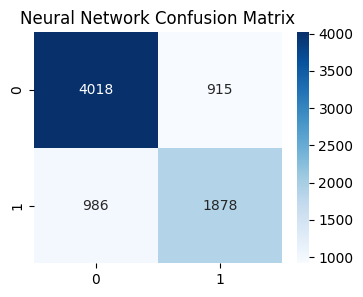

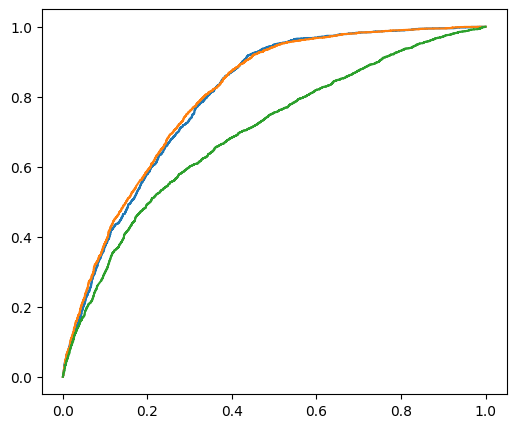

In [ ]:
models_cm = {
    "Logistic Regression": log_results["CM"],
    "Linear SVM": lin_results["CM"],
    "Polynomial SVM": poly_results["CM"],
    "Neural Network": nn_results["CM"]
}

for name, cm in models_cm.items():
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()


def plot_roc_curve(model, X, y, label):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.plot(fpr, tpr, label=label)

plt.figure(figsize=(6, 5))
plot_roc_curve(log_reg, X_test, y_test, "Logistic Regression")
plot_roc_curve(linear_svm, X_test, y_test, "Linear SVM")
plot_roc_curve(poly_svm, X_test, y_test, "Polynomial SVM")


Comparision Table

In [ ]:
results_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1", "F2", "ROC_AUC"],
    "Logistic Regression": [
        log_results["Accuracy"], log_results["Precision"], log_results["Recall"],
        log_results["F1"], log_results["F2"], log_results["ROC_AUC"]
    ],
    "Linear SVM": [
        lin_results["Accuracy"], lin_results["Precision"], lin_results["Recall"],
        lin_results["F1"], lin_results["F2"], lin_results["ROC_AUC"]
    ],
    "Polynomial SVM": [
        poly_results["Accuracy"], poly_results["Precision"], poly_results["Recall"],
        poly_results["F1"], poly_results["F2"], poly_results["ROC_AUC"]
    ],
    "Neural Network": [
        nn_results["Accuracy"], nn_results["Precision"], nn_results["Recall"],
        nn_results["F1"], nn_results["F2"], nn_results["ROC_AUC"]
    ],

"MLPClassifier" : [
    mlp_results["Accuracy"],
    mlp_results["Precision"],
    mlp_results["Recall"],
    mlp_results["F1"],
    mlp_results["F2"],
    mlp_results["ROC_AUC"],
],

})

print(" MODEL PERFORMANCE COMPARISON:\n")
print(results_df)

 MODEL PERFORMANCE COMPARISON:

      Metric  Logistic Regression  Linear SVM  Polynomial SVM  Neural Network  \
0   Accuracy             0.718610    0.722842        0.670643        0.756188   
1  Precision             0.629744    0.625133        0.648893        0.672395   
2     Recall             0.567737    0.613128        0.225209        0.655726   
3         F1             0.597136    0.619073        0.334370        0.663956   
4         F2             0.579142    0.615492        0.259036        0.658994   
5    ROC_AUC             0.799156    0.803443        0.696055        0.837058   

   MLPClassifier  
0       0.750802  
1       0.639503  
2       0.737081  
3       0.684834  
4       0.715254  
5       0.811251  
